In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('Fish.csv')
data.head(8)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900


In [7]:
data.shape

(159, 7)

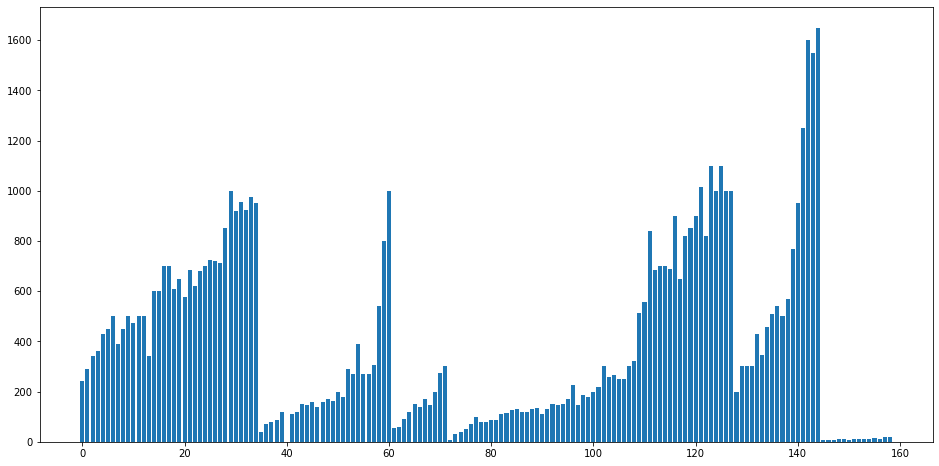

In [8]:
fig = plt.figure(figsize=(16,8))
plt.bar(range(data.shape[0]),data.Weight)
plt.show()

In [9]:
print(data.Species.unique())
print(data.Species.value_counts())

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64


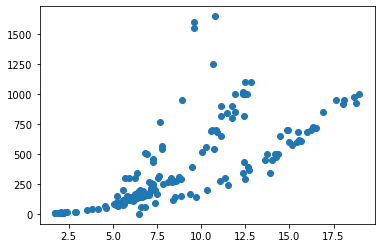

In [10]:
plt.scatter(data.Height,data.Weight)

In [11]:
temp = np.array(data)
labels = data.Species
values = temp[:,1:]
values.shape

(159, 6)

In [12]:
from sklearn.cluster import KMeans
model = KMeans(7)
model.fit(values)

KMeans(n_clusters=7)

In [13]:
model.labels_

array([1, 1, 1, 1, 5, 5, 5, 1, 5, 5, 5, 5, 5, 1, 5, 5, 2, 2, 5, 2, 5, 2,
       5, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 3, 6, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 5, 2, 4, 6, 6, 6, 3, 3,
       3, 3, 3, 3, 1, 1, 6, 6, 6, 6, 6, 3, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 5,
       5, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 4, 4, 3, 1, 1, 1,
       5, 1, 5, 5, 5, 5, 5, 2, 4, 4, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6], dtype=int32)

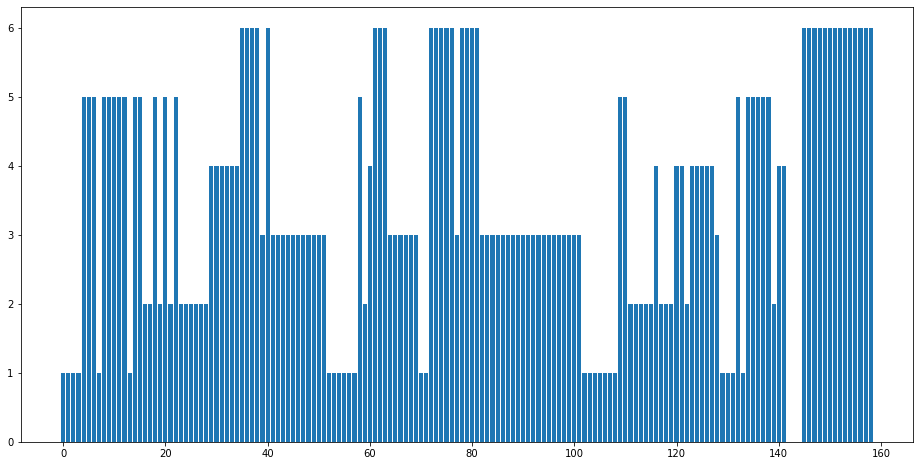

In [14]:
fig = plt.figure(figsize=(16,8))
plt.bar(range(len(model.labels_)),model.labels_)
plt.show()

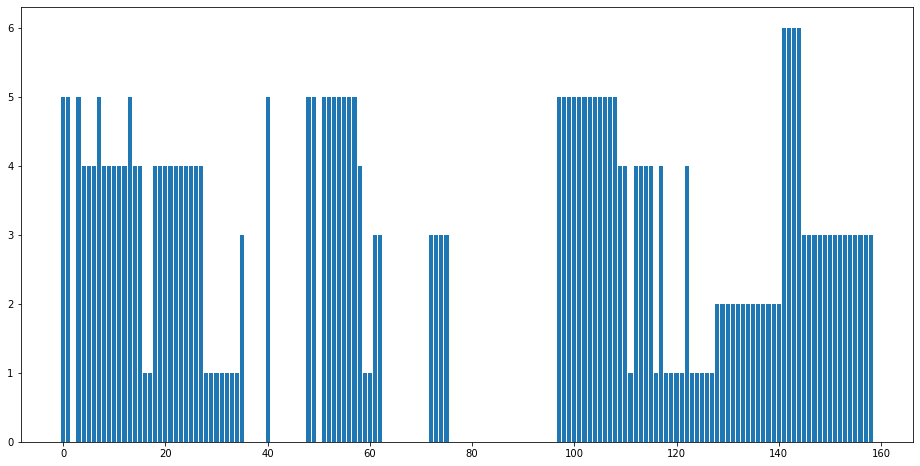

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,whiten=True)
lowDimValues = pca.fit_transform(values)
model2 = KMeans(7)
model2.fit(lowDimValues)
fig = plt.figure(figsize=(16,8))
plt.bar(range(len(model2.labels_)),model2.labels_)
plt.show()

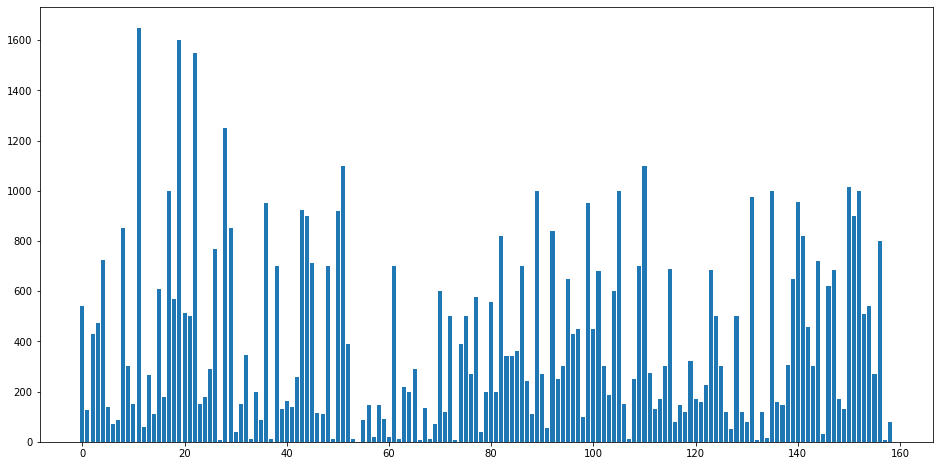

In [16]:
data = data.sample(frac=1.0)
fig = plt.figure(figsize=(16,8))
plt.bar(range(data.shape[0]),data.Weight)
plt.show()

In [17]:
train = 0.8

traindata = []
testdata = []
trainlabels = []
testlabels = []



species_names = data.Species.unique()

for i in range(len(species_names)):
    species_data = data[data.Species==species_names[i]]
    temp = np.array(species_data)
    values = temp[:,1:]
    traincount = int(train * len(species_data))
    testcount = len(species_data) - traincount
    for u in range(traincount):
        trainlabels.append(species_names[i])
        traindata.append(values[u,:])
    for v in range(traincount, traincount+testcount):
        testlabels.append(species_names[i])
        testdata.append(values[v,:])
    
traindata = np.array(traindata)   
testdata = np.array(testdata)
trainlabels = np.array(trainlabels)
testlabels = np.array(testlabels)

In [18]:
print(traindata.shape, trainlabels.shape, testdata.shape, testlabels.shape)


(124, 6) (124,) (35, 6) (35,)


In [19]:
def euclideanDistance(a, b):
    total = 0
    for i in range(a.shape[0]):
        total += (a[i]-b[i]) ** 2
    return np.sqrt(total)

def manhattanDistance(a, b):
    total = 0
    for i in range(a.shape[0]):
        total += np.abs(a[i]-b[i])
    return total


In [20]:
distances = np.zeros([testdata.shape[0],traindata.shape[0]])
for test in range(testdata.shape[0]):
    a = testdata[test,:]
    for train in range(traindata.shape[0]):
        b = traindata[train,:]
        distances[test, train] = manhattanDistance(a, b)
    
distances    

array([[246.9464,  41.5657,  42.9316, ..., 351.0756, 361.6828, 354.1619],
       [277.2288, 565.7409, 567.1068, ..., 875.2508, 885.858 , 878.3371],
       [229.0188,  60.5529,  62.3888, ..., 369.0032, 379.6104, 372.0895],
       ...,
       [608.074 , 319.5619, 318.196 , ...,  10.052 ,   0.9552,   6.9657],
       [596.107 , 307.5949, 306.229 , ...,   2.1642,  12.5222,   5.0309],
       [611.4196, 322.9075, 321.5416, ...,  13.3976,   2.8112,  10.3113]])

In [21]:
indexes = np.argsort(distances) #sorts by distances
indexes

array([[  6,  44,  81, ...,  95,  94,  92],
       [ 31,  34,  51, ..., 122,  12,  92],
       [  6,  44,  64, ...,  95,  94,  92],
       ...,
       [122, 120, 115, ...,  95,  94,  92],
       [121, 119, 116, ...,  95,  94,  92],
       [122,  12, 120, ...,  95,  94,  92]])

In [22]:
## NN Classification
predictions = []
for test in range(testdata.shape[0]):
    predictions.append(trainlabels[indexes[test,0]])
predictions = np.array(predictions)
print(predictions)
score = np.sum(predictions==testlabels)
print('Score:', score / predictions.shape[0])

['Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Parkki' 'Perch' 'Roach'
 'Perch' 'Whitefish' 'Perch' 'Perch' 'Perch' 'Bream' 'Whitefish' 'Perch'
 'Bream' 'Bream' 'Bream' 'Bream' 'Perch' 'Roach' 'Roach' 'Whitefish'
 'Pike' 'Pike' 'Pike' 'Pike' 'Perch' 'Roach' 'Perch' 'Smelt' 'Smelt'
 'Smelt']
Score: 0.6571428571428571


In [23]:
## K-NN Classification
from scipy import stats as st

K = 3
predictions = []
for test in range(testdata.shape[0]):
    temp = trainlabels[indexes[test,0:K]]
    pred = st.mode(temp).mode[0]
    predictions.append(pred)
    
predictions = np.array(predictions)
print(predictions)
score = np.sum(predictions==testlabels)
print(score / predictions.shape[0])

['Perch' 'Perch' 'Perch' 'Bream' 'Perch' 'Perch' 'Parkki' 'Perch' 'Perch'
 'Perch' 'Perch' 'Bream' 'Perch' 'Perch' 'Bream' 'Perch' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Perch' 'Parkki' 'Roach' 'Whitefish' 'Bream'
 'Pike' 'Bream' 'Perch' 'Perch' 'Parkki' 'Roach' 'Smelt' 'Smelt' 'Smelt']
0.6
